In [8]:
import matplotlib.pyplot as plt; import numpy as np; import pandas as pd
from IPython import display
import seaborn as sns
from ContributorCentricFunctions import *
%matplotlib inline

# When is a user _Experienced_?
This is a difficult question in that we cannot simply take above the mean / below the mean because of the problematic distributions within the database.

 - We can look at users who map more buildings than roads? 
 - We can look at users with more than half of their edits to buildings?

In [9]:
years = [2005+i for i in range(12)]
years

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [10]:
study_tiles = json.loads(open('study_tiles_with_compare_tiles.json','r').read())
print("Found {0} tiles.".format(len(study_tiles)))

Found 9 tiles.


# Study Tiles: Load data for a specific study tile

In [11]:
for idx, tile in enumerate(study_tiles):
    print(idx, tile['name'])

0 Port Au Prince, Haiti
1 Trisuli Bazar, Nepal
2 Tacloban
3 Kenema, Sierra Leone
4 Monrovia, Liberia
5 Kathmandu, Nepal
6 Heidelberg, Germany
7 London
8 Manhattan, NY


## 1. Get the `user_list`

In [12]:
"""
    First: Set the index for the study tile you want.
"""
study_tile_idx = 1

In [13]:
reset() #Safety for the db connections
study_tiles[study_tile_idx]['user_list'] = get_all_users_who_edited_tile(study_tiles[study_tile_idx])

2005 . 2006 . 2007 . 2008 . 2009 . 2010 . 2011 . 2012 . 2013 . 2014 . 2015 . 2016 . 

In [14]:
print("Found: {0} users".format(len(study_tiles[study_tile_idx]['user_list'])))

Found: 244 users


## 2. Build the User Distributions
If this doesn't run, run the cell 2 above again)

In [15]:
study_tiles[study_tile_idx]['users'] = build_user_distributions(study_tiles[study_tile_idx]['user_list'])
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['df'].head(2))

 757/ ~ 1171

,quadkey,year,uid,buildings,road_km,amenities,edits,num_days,user_stats_uid,user_name,total_year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
0,120013222200,2005,371,0,0.0,0,4,1,371,emj,2005,0,0.0,0,37,4
1,120031200110,2005,371,0,0.0,0,3,1,371,emj,2005,0,0.0,0,37,4


## 3. Get tile focus for each user

In [16]:
process_dictionary_of_users(study_tiles[study_tile_idx]['users'])
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['tiles'].head(2))
display.display(study_tiles[study_tile_idx]['users'][study_tiles[study_tile_idx]['user_list'][0]]['annual'].head(2))

 244/244

,edits,amenities,buildings,num_days,road_km,percent_user_road_km,percent_user_buildings,percent_user_amenities,percent_user_edits
quadkey,,,,,,,,,
012310220111,1,0,0,1,0.0,0.0,0.0,0.0,0.00169
012310220113,1,0,0,1,0.0,0.0,0.0,0.0,0.00169


,uid,user_name,year,total_buildings,total_road_km,total_amenities,total_edits,total_active_days
0,371,emj,2005,0,0.00000,0,37,4
1,371,emj,2006,0,4.10659,1,2777,42


## 4. Who is mapping what: Build Current Tile DF

In [17]:
current_tile_df = build_all_stats_for_tile(study_tiles[study_tile_idx])
current_tile_df.head(2)

,edits,amenities,buildings,num_days,road_km,percent_user_road_km,percent_user_buildings,percent_user_amenities,percent_user_edits,uid,total_editing_days_ever,total_buildings_ever,total_road_km_ever,total_amenities_ever,total_edits_ever,percent_tile_road_km,percent_tile_buildings,percent_tile_amenities,percent_tile_edits
0,1,0,1,1,0.0,0.0,0.003016,0.0,0.002544,1443840,276,33155,2078.4218,471,39313,0.0,0.013051,0.0,0.008929
1,1,0,1,1,0.0,0.0,0.847458,NaN,0.813008,2874373,1,118,3.3165,0,123,0.0,0.013051,0.0,0.008929


### Processed Study tiles now have the following attributes: 

- **name**: Name of Region
- **user_list**: List of UIDs of users who have edited on this tile
- **users**: Dictionary, keyed by UID
  - `uid`:
    - **df**: Full dataframe of all edits on all tiles by this user
    - **tiles**: DataFrame of unique tiles, summed over all years
    - **annual**: DataFrame of Editing Aggregates over all tiles, per year

# Begin Analysis

In [18]:
print("Current Study Tile: {0}".format(study_tiles[study_tile_idx]['name']))
print("\tUsers: {0}".format(len(study_tiles[study_tile_idx]['user_list'])))
print("Current_tile_df size: {0} (Should match the user count)".format(len(current_tile_df)))

Current Study Tile: Trisuli Bazar, Nepal
	Users: 244
Current_tile_df size: 244 (Should match the user count)


## Percentage of a User's edits (of all time) that occur on this tile: 

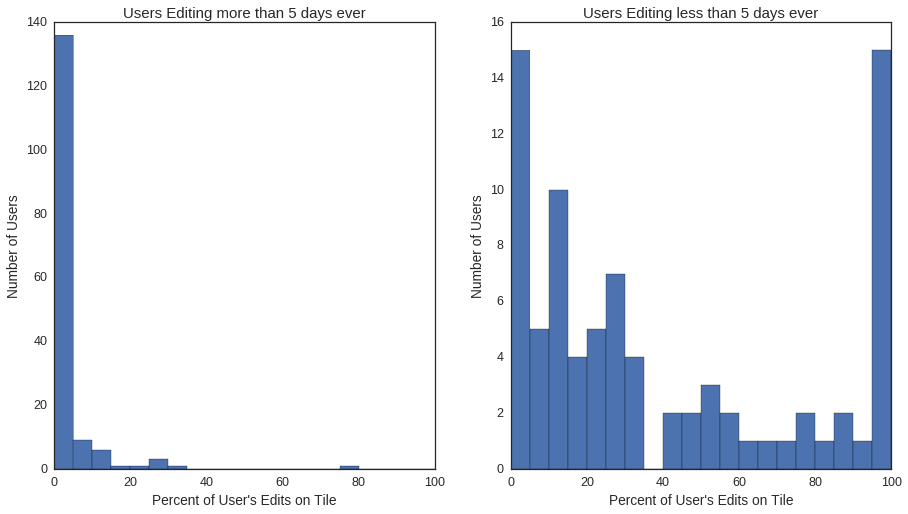

In [19]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8), facecolor='w', edgecolor='k')

current_tile_df.query('total_editing_days_ever>5').plot(ax=axs[0], kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,5))
axs[0].set_title('Users Editing more than 5 days ever')

current_tile_df.query('total_editing_days_ever<5').plot(ax=axs[1], kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,5))
axs[1].set_title('Users Editing less than 5 days ever')

for ax in axs:
    ax.set_xlabel("Percent of User's Edits on Tile")
    ax.set_ylabel('Number of Users')

## Who's Mapping Buildings and Roads?

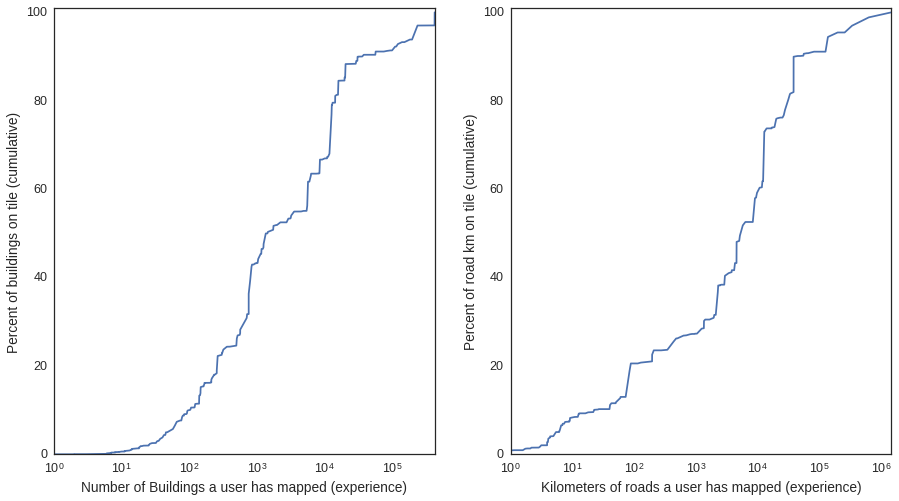

In [20]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8), facecolor='w', edgecolor='k')

b_view = current_tile_df.sort_values(by='total_buildings_ever')
b_view['cumulative_percent'] = b_view.percent_tile_buildings.cumsum()

b_view.plot(ax=axs[0],x='total_buildings_ever',y='cumulative_percent', logx=True,legend=None)

axs[0].set_ylabel('Percent of buildings on tile (cumulative)')
axs[0].set_xlabel('Number of Buildings a user has mapped (experience)')


r_view = current_tile_df.sort_values(by='total_road_km_ever')
r_view['cumulative_percent'] = r_view.percent_tile_road_km.cumsum()

r_view.plot(ax=axs[1],x='total_road_km_ever',y='cumulative_percent', logx=True,legend=None)

axs[1].set_ylabel('Percent of road km on tile (cumulative)')
axs[1].set_xlabel('Kilometers of roads a user has mapped (experience)')

for ax in axs:
    ax.set_ylim(0,101)
    ax.set_xlim(1)
#     ax.set_xlabel("Percent of User's Edits on Tile")
#     ax.set_ylabel('Number of Users')

<br>
<hr>
<br>

<hr>
# Run Tile-by-Tile Comparisons
For each study tile, we have _comparable_ tiles, these are the tiles of most interest, because the difference in patterns between these tiles and our study tiles is what makes the analysis.

## 1. Get a _comparable_ tile

In [ ]:
if 'compare_tiles' in study_tiles[study_tile_idx]:
    print("Comparable Tiles for {0}: ".format(study_tiles[study_tile_idx]['name']))
    for idx, compare in enumerate(study_tiles[study_tile_idx]['compare_tiles']):
        print("\t{0}, '{1}'".format(idx, compare['quad']))

In [ ]:
#Which tile to compare? (from within the comparable study tiles)
compare_tile_idx=0

## 2. Get Users

In [ ]:
reset()
study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list'] = get_all_users_who_edited_tile(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx])

## 3. Build actual user distribution (may take a few minutes)
If it fails, run the above cell again (probably twice)

In [ ]:
study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'] = build_user_distributions(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list'])

## 4. Now process user focus for compare tiles

In [ ]:
process_dictionary_of_users(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'])
display.display(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'][study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list'][0]]['tiles'].head(2))
display.display(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['users'][study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list'][0]]['annual'].head(2))

## 5. Build Compare Tile Full Stats

In [ ]:
compare_tile_df = build_all_stats_for_tile(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx])
compare_tile_df.count().head(2)

# Now compare the tiles

First, basic stats: 

In [ ]:
print("Users on Study Tile: {0}, {1}".format(len(study_tiles[study_tile_idx]['user_list']), len(current_tile_df)))
print("Users on Compare Tile: {0}, {1}".format(len(study_tiles[study_tile_idx]['compare_tiles'][compare_tile_idx]['user_list']), len(compare_tile_df)))

# Percentage of a User's Edits on Each Tile

In [ ]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8), facecolor='w', edgecolor='k')

current_tile_df.plot(ax=axs[0], kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,5))
axs[0].set_title(study_tiles[study_tile_idx]['name'])

compare_tile_df.plot(ax=axs[1], kind='hist',y=['percent_user_edits'], legend=None, bins=np.arange(0,101,5))
axs[1].set_title(study_tiles[study_tile_idx]['compare_tiles'][idx]['quad'])

for ax in axs:
    ax.set_xlabel("Percent of User's Edits on Tile")
    ax.set_ylabel('Number of Users')
plt.suptitle("Percentage of a User's Edits (total) Occuring on this tile",fontsize=18)
None

# Compare Buildings & Roads Across Two _Similar_ Tiles

In [ ]:
sns.set(font_scale=1.25)
plt.style.use('seaborn-white')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8), facecolor='w', edgecolor='k')

#Buildings
b_axis = axs[0]
b_view = current_tile_df.sort_values(by='total_buildings_ever')
b_view['cumulative_percent'] = b_view.percent_tile_buildings.cumsum()
b_view.plot(ax=b_axis,x='total_buildings_ever',y='cumulative_percent', logx=True,label=study_tiles[study_tile_idx]['name'])

compare_b_view = compare_tile_df.sort_values(by='total_buildings_ever')
compare_b_view['cumulative_percent'] = compare_b_view.percent_tile_buildings.cumsum()
compare_b_view.plot(ax=b_axis,x='total_buildings_ever',y='cumulative_percent', logx=True,label="Similar Tile")

b_axis.set_ylabel('Percent of buildings on tile (cumulative)')
b_axis.set_xlabel('Number of Buildings a user has mapped (experience)')

#Roads
r_axis = axs[1]
r_view = current_tile_df.sort_values(by='total_road_km_ever')
r_view['cumulative_percent'] = r_view.percent_tile_road_km.cumsum()
r_view.plot(ax=r_axis,x='total_road_km_ever',y='cumulative_percent', logx=True,label=study_tiles[study_tile_idx]['name'])

compare_r_view = compare_tile_df.sort_values(by='total_road_km_ever')
compare_r_view['cumulative_percent'] = compare_r_view.percent_tile_road_km.cumsum()
compare_r_view.plot(ax=r_axis,x='total_road_km_ever',y='cumulative_percent', logx=True,label="Similar Tile")

r_axis.set_ylabel('Percent of road km on tile (cumulative)')
r_axis.set_xlabel('Kilometers of roads a user has mapped (experience)')

for ax in [r_axis, b_axis]:
    ax.set_ylim(0,101)
    ax.set_xlim(1)